In [16]:
import pandas as pd
from pathlib import Path
import torch
from multi_time_gnn.utils import load_config, load_model
from multi_time_gnn.model import get_model

In [19]:
file_path_electrodes = "../../electrode_location.tsv"
file_path_model = "../result_models/eeg/horizon_6_mtgnn"

In [20]:
# Read the TSV file
df = pd.read_csv(file_path_electrodes, sep='\t')
locations_electrodes = df.iloc[:, 1:].to_numpy()

In [21]:
config = load_config(file_path_model + "/config.yaml")
config.device = torch.device("cpu")
model = load_model(get_model(config), Path(file_path_model), config)
graph = model.graph_learn()

In [22]:
locations_electrodes.shape

(66, 3)

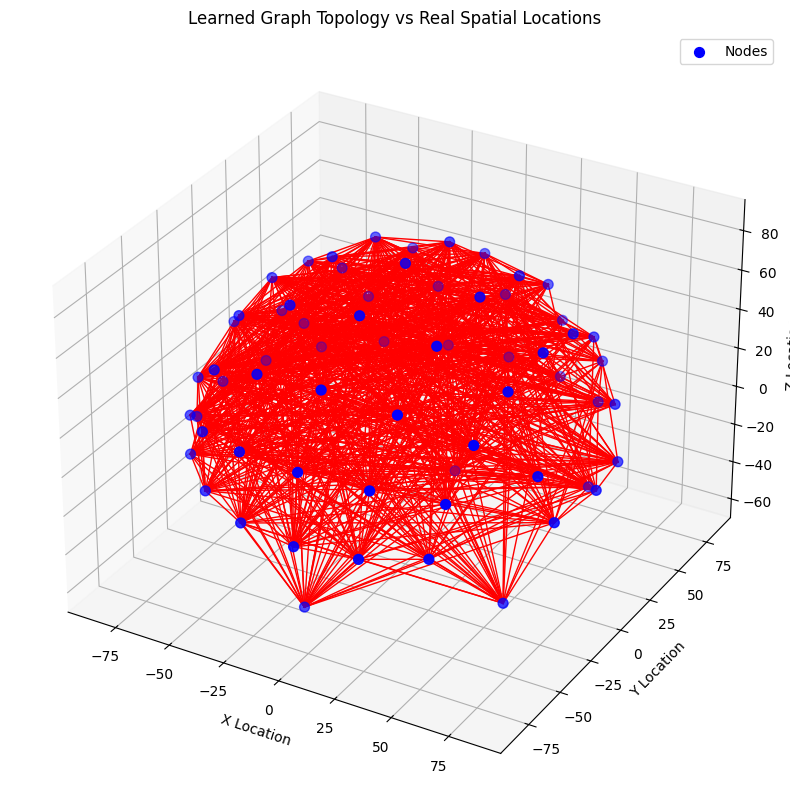

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- STEP 1: LOAD YOUR DATA HERE ---
# Ideally, load your data here. For this example, I am creating random data.
# real_locations = np.load('your_locations.npy') # Shape: (66, 3)
# learned_adj = np.load('your_adjacency.npy')    # Shape: (66, 66)

# Generating dummy data for demonstration:
num_nodes = 66
real_locations = locations_electrodes
learned_adj = graph

# Optional: Threshold the adjacency matrix if it's fully connected (dense).
# This prevents the plot from looking like a messy "hairball".
# If your matrix is already sparse (mostly zeros), you can skip this.
threshold = 0.95
learned_adj[learned_adj < threshold] = 0

# --- STEP 2: PLOTTING ---
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 1. Plot the Nodes
# We extract the X, Y, and Z columns from the (66x3) tensor
xs = real_locations[:, 0]
ys = real_locations[:, 1]
zs = real_locations[:, 2]

ax.scatter(xs, ys, zs, c='blue', s=50, label='Nodes')

# 2. Plot the Edges based on Adjacency Matrix
# Get the indices (i, j) where an edge exists (value > 0)
rows, cols = np.where(learned_adj > 0)

for i, j in zip(rows, cols):
    # if i < j: # Ensure we don't draw the same edge twice (i->j and j->i)
    if learned_adj[i, j].item() == 1.:
        # Get coordinates for the two connected nodes
        x_line = [real_locations[i, 0], real_locations[j, 0]]
        y_line = [real_locations[i, 1], real_locations[j, 1]]
        z_line = [real_locations[i, 2], real_locations[j, 2]]
        
        # Draw the line
        # You can map the alpha (opacity) to the edge weight to show connection strength
        weight = learned_adj[i, j].item()
        ax.plot(x_line, y_line, z_line, color='red', alpha=weight, linewidth=1)

ax.set_xlabel('X Location')
ax.set_ylabel('Y Location')
ax.set_zlabel('Z Location')
ax.set_title('Learned Graph Topology vs Real Spatial Locations')
plt.legend()
plt.savefig("learned_graph.png")
plt.show()

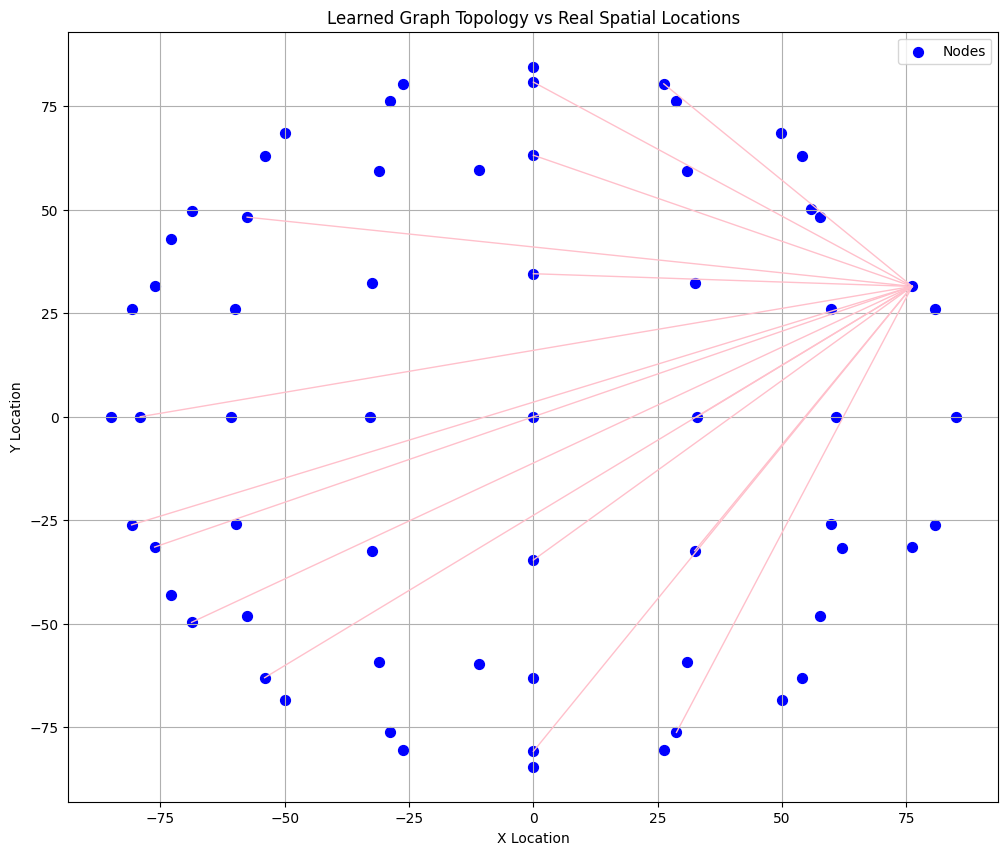

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- STEP 1: LOAD YOUR DATA HERE ---
# Ideally, load your data here. For this example, I am creating random data.
# real_locations = np.load('your_locations.npy') # Shape: (66, 3)
# learned_adj = np.load('your_adjacency.npy')    # Shape: (66, 66)

# Generating dummy data for demonstration:
num_nodes = 66
real_locations = locations_electrodes
learned_adj = graph

# Optional: Threshold the adjacency matrix if it's fully connected (dense).
# This prevents the plot from looking like a messy "hairball".
# If your matrix is already sparse (mostly zeros), you can skip this.
threshold = 0.95
learned_adj[learned_adj < threshold] = 0

# --- STEP 2: PLOTTING ---
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)

# 1. Plot the Nodes
# We extract the X, Y, and Z columns from the (66x3) tensor
xs = real_locations[:, 0]
ys = real_locations[:, 1]
# zs = real_locations[:, 2]

ax.scatter(xs, ys, c='blue', s=50, label='Nodes')

# 2. Plot the Edges based on Adjacency Matrix
# Get the indices (i, j) where an edge exists (value > 0)
rows, cols = np.where(learned_adj > 0)

for i, j in zip(rows, cols):
    # if i < j: # Ensure we don't draw the same edge twice (i->j and j->i)
    if learned_adj[i, j].item() == 1. and i ==3:
        # Get coordinates for the two connected nodes
        x_line = [real_locations[i, 0], real_locations[j, 0]]
        y_line = [real_locations[i, 1], real_locations[j, 1]]
        # z_line = [real_locations[i, 2], real_locations[j, 2]]
        
        # Draw the line
        # You can map the alpha (opacity) to the edge weight to show connection strength
        weight = learned_adj[i, j].item()
        ax.plot(x_line, y_line, color='pink', alpha=weight, linewidth=1)

ax.set_xlabel('X Location')
ax.set_ylabel('Y Location')
ax.set_title('Learned Graph Topology vs Real Spatial Locations')
plt.legend()
plt.grid()
plt.savefig("learned_graph.png")
plt.show()

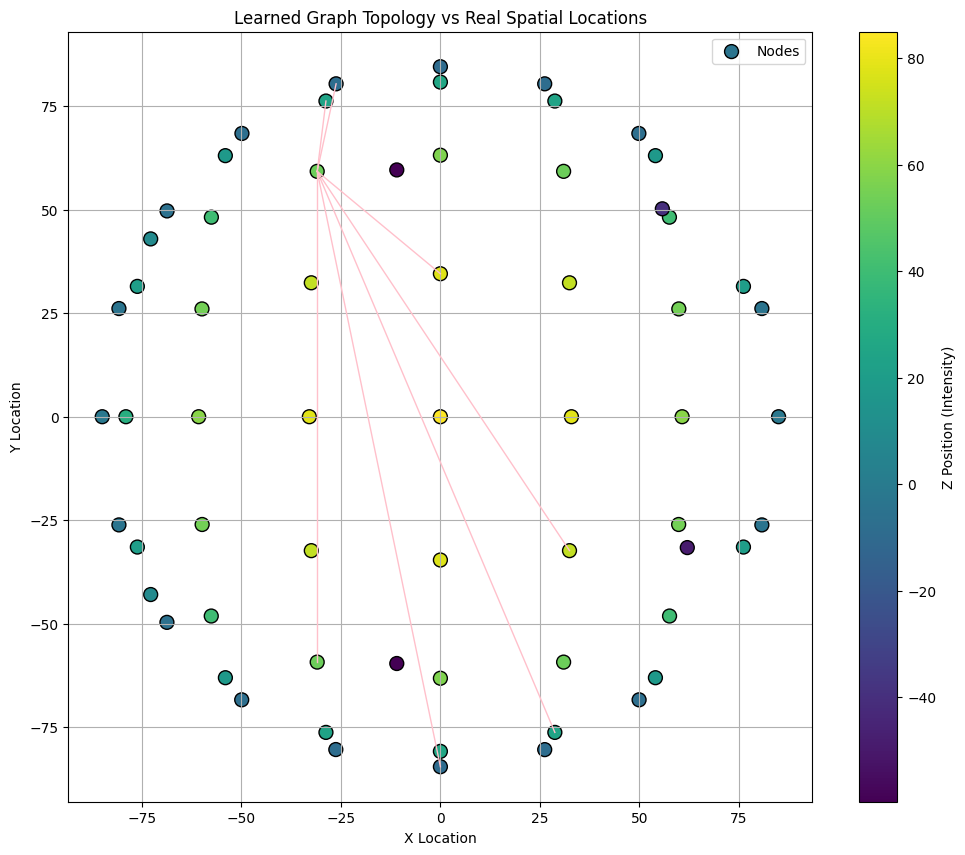

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# --- STEP 1: LOAD YOUR DATA HERE ---
# real_locations = np.load('your_locations.npy') # Shape: (66, 3)
# learned_adj = np.load('your_adjacency.npy')    # Shape: (66, 66)

# Assuming these variables exist in your environment as per your snippet:
real_locations = locations_electrodes
learned_adj = graph

# Optional: Threshold
threshold = 0.95
learned_adj[learned_adj < threshold] = 0

# --- STEP 2: PLOTTING ---
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)

# 1. Plot the Nodes
xs = real_locations[:, 0]
ys = real_locations[:, 1]
zs = real_locations[:, 2]  # We need Z for the color

# c=zs sets the color based on the Z value
# cmap='viridis' is the color map (options: 'plasma', 'inferno', 'Blues', 'Reds')
# s=100 makes the nodes slightly larger to see the color better
sc = ax.scatter(xs, ys, c=zs, cmap='viridis', s=100, label='Nodes', edgecolors='k')

# Add a colorbar to indicate what the colors mean
cbar = plt.colorbar(sc)
cbar.set_label('Z Position (Intensity)')

# 2. Plot the Edges based on Adjacency Matrix
rows, cols = np.where(learned_adj > 0)

for i, j in zip(rows, cols):
    # Your specific filter: Edge weight is 1.0 AND node is index 3
    if learned_adj[i, j].item() == 1. and i == 35:
        x_line = [real_locations[i, 0], real_locations[j, 0]]
        y_line = [real_locations[i, 1], real_locations[j, 1]]
        
        weight = learned_adj[i, j].item()
        ax.plot(x_line, y_line, color='pink', alpha=weight, linewidth=1)

ax.set_xlabel('X Location')
ax.set_ylabel('Y Location')
ax.set_title('Learned Graph Topology vs Real Spatial Locations')
plt.legend()
plt.grid(True)
plt.savefig("learned_graph.png")
plt.show()